In [ ]:

# 0. INTRO - K-Means sur Swiss Roll

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,6)

print("Notebook : K-Means sur Swiss Roll (non supervisé)")



Notebook : K-Means sur Swiss Roll (non supervisé)


C:\Users\Kered\AppData\Local\Temp\ipykernel_18664\3078363525.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:,0], X[:,1], X[:,2], s=10, cmap="viridis")


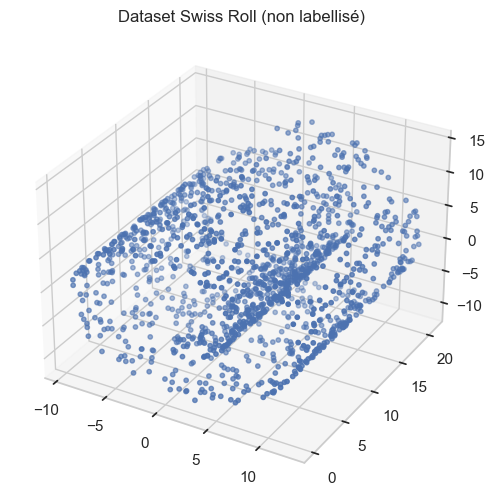

In [ ]:

# Swiss Roll : dataset 3D non linéaire pour démonstration

X, _ = make_swiss_roll(n_samples=1500, noise=0.05, random_state=42)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=10, cmap="viridis")
ax.set_title("Dataset Swiss Roll (non labellisé)")
plt.show()


2. K-Means (test avec K=3)

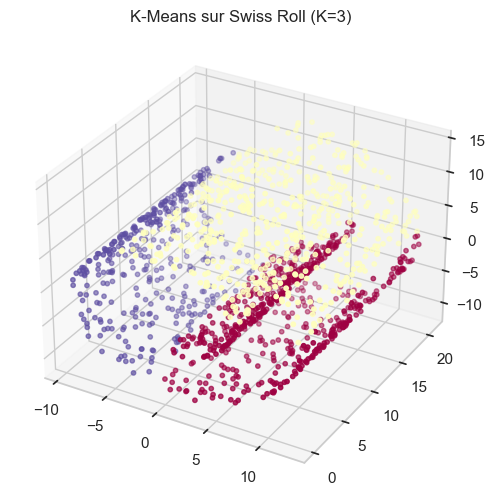

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels, s=10, cmap="Spectral")
ax.set_title("K-Means sur Swiss Roll (K=3)")
plt.show()


3. Pourquoi K-Means échoue sur Swiss Roll ?

In [6]:
print("""
On observe que K-Means coupe la structure en 'tranches',
car il suppose des clusters sphériques.

Swiss Roll = une surface 2D enroulée dans un espace 3D.
K-Means n'arrive pas à suivre la forme non linéaire.
""")




On observe que K-Means coupe la structure en 'tranches',
car il suppose des clusters sphériques.

Swiss Roll = une surface 2D enroulée dans un espace 3D.
K-Means n'arrive pas à suivre la forme non linéaire.



4. Méthode du Coude (Elbow Method)

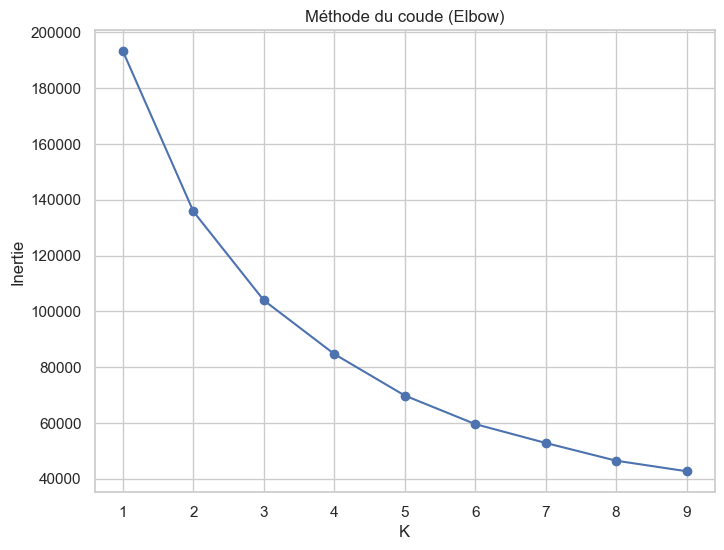

In [7]:
inertias = []
K_values = range(1,10)

for k in K_values:
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K_values, inertias, "-o")
plt.xlabel("K")
plt.ylabel("Inertie")
plt.title("Méthode du coude (Elbow)")
plt.show()


5. Silhouette Score pour plusieurs K

In [8]:
for k in range(2,7):
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels_k = km.fit_predict(X)
    score = silhouette_score(X, labels_k)
    print(f"K={k}, silhouette={score:.3f}")


K=2, silhouette=0.278
K=3, silhouette=0.287
K=4, silhouette=0.292
K=5, silhouette=0.299
K=6, silhouette=0.304


6. Réduction de dimension (PCA) pour mieux clusteriser

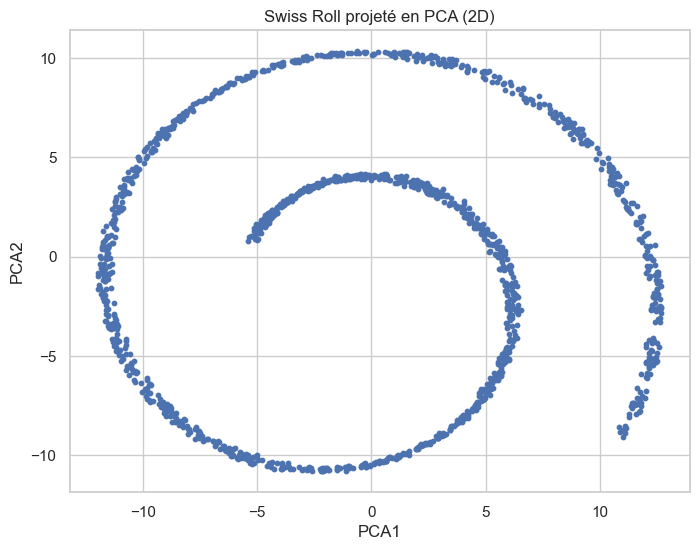

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
plt.title("Swiss Roll projeté en PCA (2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


7. K-Means après PCA

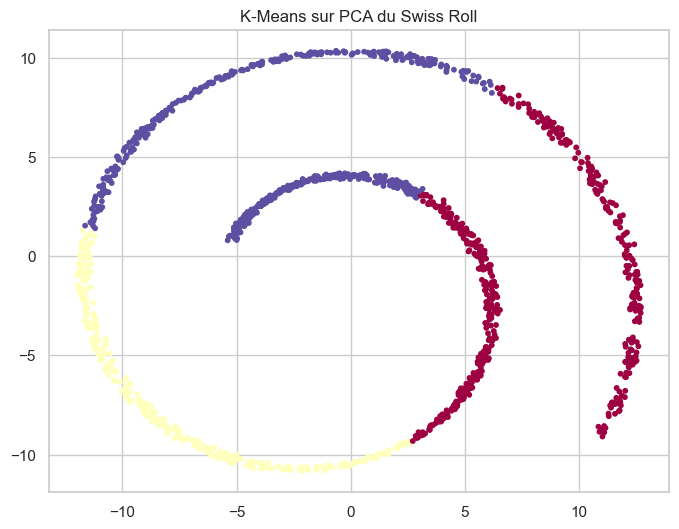

In [10]:
kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_pca, s=10, cmap="Spectral")
plt.title("K-Means sur PCA du Swiss Roll")
plt.show()



1 Teste K=2, 3, 4, 5 sur les données brutes.
    → Compare les couleurs et l’inertie.

2 Recalcule silhouette_score sur PCA
    → Comment évolue la qualité ?

3 Ajoute du bruit :
       X_noisy = X + np.random.normal(0, 3, X.shape)
    → K-Means est-il robuste ?

4 Change de réduction de dimension :
       - PCA
       - t-SNE
       - UMAP (si dispo)
    → Quel est le meilleur pour Swiss Roll ?

5 Bonus : 
    Compare K-Means avec SpectralClustering.
    (Spectral marche BEAUCOUP mieux sur Swiss Roll)